In [1]:
import bpy
import open3d as o3d
import numpy as np

# Load the .blend file (provide the full path to your .blend file)
blend_file_path = "/home/santhanam.17/8262593/blend/000500.blend"
bpy.ops.wm.open_mainfile(filepath=blend_file_path)
# Get the mesh objects in the scene
mesh_objects = [obj for obj in bpy.context.scene.objects if obj.type == "MESH"]


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/home/santhanam.17/anaconda3/envs/blender_3.10/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/santhanam.17/anaconda3/envs/blender_3.10/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/santhanam.17/anaconda3/envs/blender_3.10/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/santhanam.17/anaconda3/envs/blender_3.10/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


Read blend: /home/santhanam.17/8262593/blend/000500.blend


In [2]:
for obj in mesh_objects:
    print(f"Mesh Object Name: {obj.name}")
    mesh = obj.data
    bpy.context.view_layer.objects.active = obj
    bpy.ops.object.mode_set(mode='EDIT')
    bpy.ops.mesh.select_all(action='SELECT')

    # Triangulate the mesh
    bpy.ops.mesh.quads_convert_to_tris(quad_method='BEAUTY', ngon_method='BEAUTY')

    # Return to object mode
    bpy.ops.object.mode_set(mode='OBJECT')

Mesh Object Name: 264989a2572654787822bac34489b30e


In [3]:
# Access mesh information
for obj in mesh_objects:
    print(f"Mesh Object Name: {obj.name}")
    mesh = obj.data
    print(obj.material_slots[1].material)
    vertices = np.array([vertex.co for vertex in mesh.vertices])
    print(f"Number of Vertices: {len(mesh.vertices)}")
    print(f"Number of Faces: {len(mesh.polygons)}")
    print(f"Number of Edges: {len(mesh.edges)}")
    print("Vertex Coordinates:")
    """for vertex in mesh.vertices:
        print(f" - {vertex.co}")"""
    #faces = [p.loop_indices for p in mesh.polygons]

    faces = []
    vertex_colors = np.zeros((len(mesh.vertices), 3))
    #print(faces)
    for i in mesh.polygons:
        #print([k for k in i.loop_indices])
        faces.append([k for k in i.loop_indices])
    
    """#print(mesh.vertex_colors.loop_colors)
    for loop_index, loop_color in enumerate(mesh.vertex_colors.active.data):
            vertex_colors[loop_index] = loop_color.color
    #print(faces)"""
    o3d_mesh = o3d.geometry.TriangleMesh()
    o3d_mesh.vertices = o3d.utility.Vector3dVector(vertices)
    o3d_mesh.triangles = o3d.utility.Vector3iVector(faces)
    #o3d_mesh.vertex_colors = o3d.utility.Vector3dVector(vertex_colors)
    pcd_o3d = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(vertices))


Mesh Object Name: 264989a2572654787822bac34489b30e
<bpy_struct, Material("Color_009") at 0x55691204fe98>
Number of Vertices: 17782
Number of Faces: 27562
Number of Edges: 44981
Vertex Coordinates:


13212


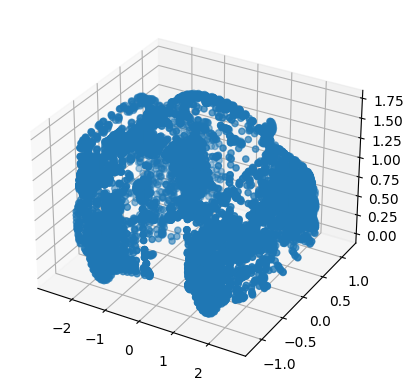

In [4]:

from matplotlib import pyplot as plt
pcd = np.asarray(pcd_o3d.points)
pcd = [x for x in pcd if x[0]!=0 and x[1]!=0]
pcd = np.unique(pcd, axis =0)
print(len(pcd))

"""point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(pcd)
point_cloud=o3d.geometry.PointCloud.

pcd=np.asarray(point_cloud.points)"""
list_of_x=[x[0] for x in pcd]
list_of_y=[x[1] for x in pcd]
list_of_z=[x[2] for x in pcd]
ax = plt.axes(projection ='3d')

ax.scatter(list_of_x,list_of_y,list_of_z)

#print(len([x[3] for x in pcd if x[3]!=0]))

In [ ]:
#Mesh extracted from Blend file
o3d_mesh.select_by_index([1])

: 

: 

In [ ]:
o3d_mesh.compute_vertex_normals()

: 

: 

In [44]:
print("Try to render a mesh with normals (exist: " +
      str(o3d_mesh.has_vertex_normals()) + ") and colors (exist: " +
      str(o3d_mesh.has_vertex_colors()) + ")")
#o3d_mesh.compute_vertex_normals()
o3d_mesh.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([o3d_mesh])
print("A mesh with no normals and no colors does not look good.")

Try to render a mesh with normals (exist: False) and colors (exist: False)
A mesh with no normals and no colors does not look good.


In [41]:
# Create a scene and add the triangle mesh.
cube = o3d.t.geometry.TriangleMesh.from_legacy(o3d_mesh)
scene = o3d.t.geometry.RaycastingScene()
cube_id=scene.add_triangles(cube)
print(cube_id)

0


In [42]:
print(cube.triangle["indices"][0])
print(cube.vertex["positions"][1750])


[0 1 2]
Tensor[shape={3}, stride={1}, Int64, CPU:0, 0x55691cfdee00]
[-2.39855 0.535133 0.30947852]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x55691d818978]


In [15]:
cube.triangle

TensorMap(primary_key="indices") with 1 attribute:
  - indices: shape={27562, 3}, dtype=Int64, device=CPU:0 (primary)
  (Use . to access attributes, e.g., tensor_map.indices)

In [7]:
np.asarray(o3d_mesh)

array([[ 0.0843551 ,  0.0629568 ,  0.22459251],
       [-0.088953  ,  0.0626031 ,  0.22459251],
       [-0.088953  ,  0.035369  ,  0.23237351],
       ...,
       [-2.41251993,  0.83712399,  1.14922655],
       [-2.27183008,  0.92362499,  1.0252105 ],
       [-2.20805001,  0.935314  ,  1.02463746]])

In [81]:

import random
rays=[]
for j in range(0,15):
    for i in np.arange(-5,5,0.08):
        for k in np.arange(-24.8,26.8,0.4):
            key_tuple=(j,i,k)
            rays.append([[-5,random.uniform(i+0.01,i-0.01),random.uniform(k+0.05,k-0.05)]])





In [82]:
len(rays)

[[[5, 0, 2], [-5, -4.997246304789427, -24.847389864293426]],
 [[5, 0, 2], [-5, -5.000673735564545, -24.37609639004966]],
 [[5, 0, 2], [-5, -4.9949996573264155, -24.008362242233297]],
 [[5, 0, 2], [-5, -4.991537461902644, -23.598702819401645]],
 [[5, 0, 2], [-5, -5.008256285792145, -23.153582136530396]],
 [[5, 0, 2], [-5, -5.005692373092712, -22.75486974052425]],
 [[5, 0, 2], [-5, -5.009465838779297, -22.430107493322485]],
 [[5, 0, 2], [-5, -4.998330492608843, -21.975832262475308]],
 [[5, 0, 2], [-5, -4.996821218586895, -21.6110094728681]],
 [[5, 0, 2], [-5, -4.993897943769558, -21.182420756478646]],
 [[5, 0, 2], [-5, -5.00031008359726, -20.834213858083157]],
 [[5, 0, 2], [-5, -4.99866457797678, -20.39638142910898]],
 [[5, 0, 2], [-5, -4.992298407210551, -20.039943371057284]],
 [[5, 0, 2], [-5, -5.007362035072105, -19.642516422768004]],
 [[5, 0, 2], [-5, -4.994206304564195, -19.151629918736692]],
 [[5, 0, 2], [-5, -5.0048513239382535, -18.838953394840395]],
 [[5, 0, 2], [-5, -5.00024869

KeyboardInterrupt: 

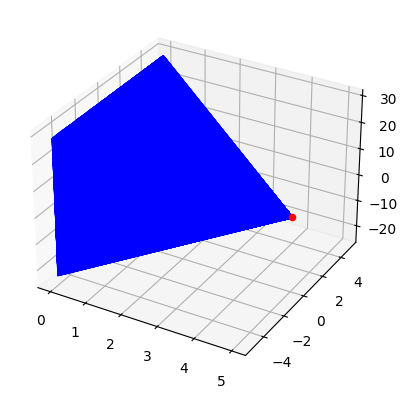

In [83]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
start=[5,0,2]
X=start[0]
Y=start[1]
Z=start[2]
# Plot the point
ax.scatter(X, Y, Z, color='r', label='Point')

for i in rays:
    
    direction_vector = np.array(i[1])
    origin = np.array(i[0])
    end_point = origin + direction_vector
    ax.plot([X, end_point[0]], [Y, end_point[1]], [Z, end_point[2]], color='b')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [86]:

cube_id=scene.add_triangles(cube)
#dict={}
pcd_list=[]
#rays=dictionary.values()
for i in rays:
    ray1 = o3d.core.Tensor([[i[0][0], i[0][1], i[0][2], i[1][0], i[1][1], -i[1][2]]],
                        dtype=o3d.core.Dtype.Float32)
    
    ans1 = scene.cast_rays(ray1)
    #hit = ans1['primitive_normals'].numpy()
    #print(hit)
    """print(ans1['primitive_uvs'].numpy())
    print(ans1['primitive_ids'].numpy())
    print(ans1['t_hit'].numpy())
    print(ans1['geometry_ids'].numpy())"""
    
    hit = ans1['t_hit'].isfinite()

    points = ray1[hit][:,:3] + ray1[hit][:,3:]*ans1['t_hit'][hit].reshape((-1,1))
    
    #pcd_points = o3d.t.geometry.PointCloud()
    if hit:
        pcd_list.append(points.numpy()[0])
        
        #pcd_points.

#ans2 = scene.cast_rays(ray2)
#print(cube_id)

In [85]:
np.array(pcd_list)

array([], dtype=float64)

In [87]:
original_pcd =o3d.geometry.PointCloud()
original_pcd.points=o3d.utility.Vector3dVector(pcd_list)

In [88]:
original_pcd

PointCloud with 4246 points.

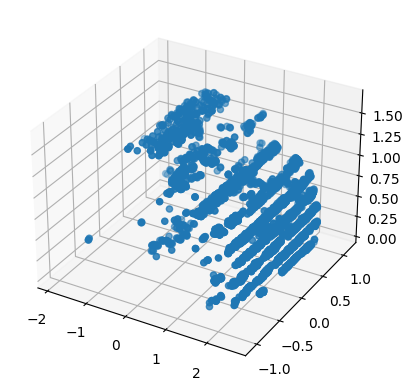

In [89]:

pcd = np.asarray(original_pcd.points)
#pcd = [x for x in pcd if x[0]!=0 and x[1]!=0]
#pcd = np.unique(pcd, axis =0)
#print(pcd)

"""point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(pcd)
point_cloud=o3d.geometry.PointCloud.

pcd=np.asarray(point_cloud.points)"""
list_of_x=[x[0] for x in pcd]
list_of_y=[x[1] for x in pcd]
list_of_z=[x[2] for x in pcd]
ax = plt.axes(projection ='3d')

ax.scatter(list_of_x,list_of_y,list_of_z)

In [73]:
pcd
#pcd_list
pcd_points = o3d.t.geometry.PointCloud(points)
pcd_points.
original_pcd=pcd_list.to_legacy()
original_pcd.points


PointCloud with 284 points.

In [32]:
rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    center=[-2, 0, 2],
    eye=[2, 3, 0],
    up=[0, 0, 0],
    width_px=640,
    height_px=480,
)

ans = scene.cast_rays(rays)
cube_id=scene.add_triangles(cube)
print(cube_id)

8


In [91]:
#print(dict)
import torch
print(dict[9])
print(ans1['primitive_uvs'])

[[-0.07335009 -0.02150464 -0.99707437]]
[[0.83701783 0.0063032503]]
Tensor[shape={1, 2}, stride={2, 1}, Float32, CPU:0, 0x55ae8dbc2100]


In [90]:
hit = ans1['t_hit'].isfinite()
points = ray1[hit][:,:3] + ray1[hit][:,3:]*ans1['t_hit'][hit].reshape((-1,1))
print(points)
pcd_points = o3d.t.geometry.PointCloud(points)

[[1.0145116 0.13060467 1.1306046]]
Tensor[shape={1, 3}, stride={3, 1}, Float32, CPU:0, 0x55ae904340c0]


In [43]:
original_pcd=pcd_points.to_legacy()
original_pcd.points

std::vector<Eigen::Vector3d> with 1 elements.
Use numpy.asarray() to access data.

[[0.         0.         0.19453697]]


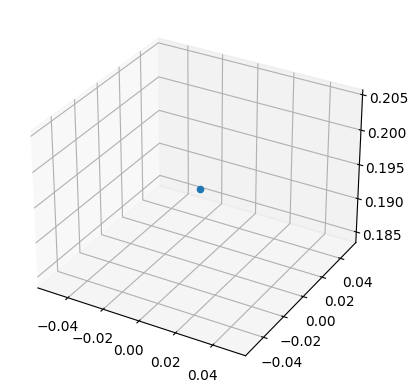

In [44]:
pcd = np.asarray(original_pcd.points)
#pcd = [x for x in pcd if x[0]!=0 and x[1]!=0]
#pcd = np.unique(pcd, axis =0)
print(pcd)

"""point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(pcd)
point_cloud=o3d.geometry.PointCloud.

pcd=np.asarray(point_cloud.points)"""
list_of_x=[x[0] for x in pcd]
list_of_y=[x[1] for x in pcd]
list_of_z=[x[2] for x in pcd]
ax = plt.axes(projection ='3d')

ax.scatter(list_of_x,list_of_y,list_of_z)

In [14]:
pcd

PointCloud on CPU:0 [1 points (Float32)].
Attributes: None.

TypeError: Invalid shape (1,) for image data

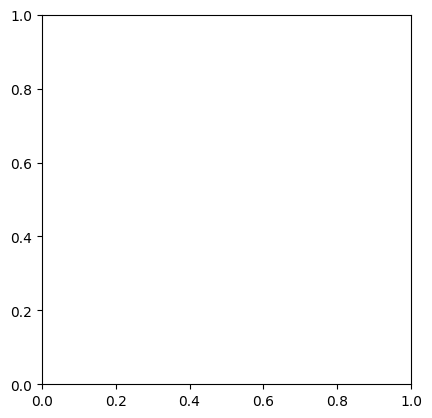

In [15]:
import matplotlib.pyplot as plt
plt.imshow(ans['t_hit'].numpy())